# Imdb sentiment analysis

L’analyse de sentiments est une technique qui s’est fortement développée en même temps que les réseaux sociaux, où les utilisateurs ont la possibilité de s’exprimer massivement et de partager en permanence leurs sentiments. L’analyse de sentiment (ou sentiment analysis en anglais) vise donc à déterminer la tonalité émotionnelle d’un discours en le classifiant dans différentes catégories comme positif, négatif ou neutre par exemple.
Le but de cet exercice est de faire de l'analyse de sentiment sur des critiques de films faites par des internautes. 


Télécharger les données et extraire l'archive.

In [265]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#### Charger les commentaires dans un dataframe pandas.

In [266]:
data = pd.read_csv('./french_tweets.csv')
data.head()


,label,text
0,1,"Je vous aime, les gars sont les meilleurs!"
1,1,Je me retrouve avec un de mes besties ce soir!...
2,1,"Merci pour l'ajout de Twitter, sunisa! Je dois..."
3,1,Être malade peut être vraiment bon marché quan...
4,1,Il a cet effet sur tout le monde


Afficher deux critiques positives et deux critiques négatives. Le texte a t-il besoin de prétraitrement ? Lesquels. 

In [267]:
# Sélection de deux critiques positives et deux critiques négatives
positives = data[data['label'] == 1].head(2)
negatives = data[data['label'] == 0].head(2)

# Afficher les exemples
print("Critiques positives :")
print(positives['text'])
print("\nCritiques négatives :")
print(negatives['text'])


Critiques positives :
0           Je vous aime, les gars sont les meilleurs!
1    Je me retrouve avec un de mes besties ce soir!...
Name: text, dtype: object

Critiques négatives :
10000    - Awww, c'est un bummer. Tu devrais avoir davi...
10001    Est contrarié qu'il ne puisse pas mettre à jou...
Name: text, dtype: object


#### Nettoyage des commentaires : 
- enlever la ponctuaction et les caractères spéciaux
- enlever les stopwords
- lemmatisation

In [269]:
import string
import re
# Liste de base de stopwords français
stopwords_fr_base = [
    "a", "ai", "aie", "aient", "aies", "ait", "alors", "as", "au", "aucun", "aura", "aurai", "auraient", "!", "de", "la", "et", "je", "le", "tu", "il", "elle", "nous", "vous", "ils", "elles", "ce", "ces", "cet", "cette", "en", "mais", "ou", "donc", "or", "ni", "car", "ne", "pas", "plus", "peu", "beaucoup", "trop", "très", "peut", "peux", "peuvent", "peux", "pour", "par", "parce", "que", "qui", "quoi", "quand", "où", "comment", "est", "suis", "es", "sommes", "êtes", "sont", "ai", "as", "avons", "avez", "ont", "mon", "ton", "son", "ma", "ta", "sa", "mes", "tes", "ses", "notre", "votre", "leur", "nos", "vos", "leurs", "ceci", "cela", "celui", "celle", "ceux", "celles", "ici", "là", "dans", "hors", "dehors", "dedans", "depuis", "dehors", "de", "à", "avec", "sans", "sous", "sur", "dans", "vers", "entre", "parmi", "pour", "contre", "chez", "comme", "si", "soit", "soient", "sois", "soyons", "soyez", "étant", "était", "étions", "étiez", "étaient", "fut", "fûmes", "fûtes", "furent", "ayant", "eu", "eue", "eues", "eus", "ai", "as", "avons", "avez", "ont", "aurai", "auras", "aura", "aurons", "aurez", "auront", "aurais", "aurait", "aurions", "auriez", "auraient", "avais", "avait", "avions", "aviez", "avaient", "eut", "eûmes", "eûtes", "eurent","des","la","maison","dans","les","du","au","de","et","à","un","une","pour","est","le","en","que","qui","par","sur","avec","plus","pas","son","ce","se","il","ne","sa","mais","vous","nous","dans","tout","elle","fait","comme","ses","leur","aussi","ont","ces","ont","ont", "les","ils","leurs","sans","deux","alors","après","avant","avoir","autre","autres","car","cependant","chaque","ci","comme","comment","dans","des","donc","dont","du","elle","elles","en","encore","est","et","eu","fait","faites","fois","font","hors","ici","il","ils","je","juste","la","le","les","leur","là","ma","maintenant","mais","mes","mien","moins","mon","mot","même","ni","nommés","notre","nous","ou","où","par","parce","pas","peut","peu","plupart","pour","pourquoi","quand","que","quel","quelle","quelles","quels","qui","sa","sans","ses","seulement","si","sien","son","sont","sous","soyez","sujet","sur","ta","tandis","tellement","tels","tes","ton","tous","tout","trop","très","tu","voient","vont","votre","vous","vu","ça","étaient","état","étions","été","être","être","ai","as","avons","avez","ont","est","suis","es","sommes","êtes","sont","serai","seras","sera","serons","serez","seront","serais","serait","serions","seriez","seraient","étais","était","étions","étiez","étaient","fus","fut","fûmes","fûtes","furent","sois","soit","soyons","soyez","soient","fusse","fusses","fût","fussions","fussiez","fussent","ayant","ayante","ayantes","ayants","eu","eue","eues","eus","ai","as","avons","avez","ont","aurai","auras","aura","aurons","aurez","auront","aurais","aurait","aurions","auriez","auraient","avais","avait","avions","aviez","avaient","eut","eûmes","eûtes","eurent","aie","aies","ait","ayons","ayez","aient","eusse","eusses","eût","eussions","eussiez","eussent", "jai", "maintenant", "cest", "merci", "jour", "journee", "journees", "journe"
    
]

Créer une fonction permettant de nettoyer le texte

In [270]:
def nettoyer_texte(texte):
    # Enlever la ponctuation
    texte = "".join([char for char in texte if char not in string.punctuation])
    
    # Enlever les caractères non alphanumériques
    texte = re.sub(r'[^a-zA-Z0-9\s]', '', texte)
    
    # Enlever les stopwords et retourner le texte nettoyé
    return " ".join([mot for mot in texte.split() if mot.lower() not in stopwords_fr_base])



Importer spacy et charger le modèle de langue francaise

In [271]:
import spacy
nlp = spacy.load('fr_core_news_sm')

In [272]:
nlp.Defaults.stop_words

{'a',
 'abord',
 'afin',
 'ah',
 'ai',
 'aie',
 'ainsi',
 'ait',
 'allaient',
 'allons',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'antérieur',
 'antérieure',
 'antérieures',
 'apres',
 'après',
 'as',
 'assez',
 'attendu',
 'au',
 'aupres',
 'auquel',
 'aura',
 'auraient',
 'aurait',
 'auront',
 'aussi',
 'autre',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avoir',
 'avons',
 'ayant',
 'bas',
 'basee',
 'bat',
 "c'",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-la',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-la',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-la',
 'celui-là',
 'cent',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'certes',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'chacun',
 'chacune',
 'chaque',
 'chez',
 'ci',
 'cinq',
 'cinquantaine',
 'cinquante',
 'cinquantième',
 'cinquième',
 'combien',
 'comme',
 'comment',

Appliquer le nettoyage sur l'ensemble des commentaires du dataframe. Cette étape prend un peu (beaucoup) de temps, c'est normal!

In [273]:
# Appliquer la fonction de nettoyage sur tous les commentaires
data['text_clean'] = data['text'].apply(nettoyer_texte)

# Afficher les premières lignes du DataFrame nettoyé pour vérifier
print(data.head())

   label                                               text  \
0      1         Je vous aime, les gars sont les meilleurs!   
1      1  Je me retrouve avec un de mes besties ce soir!...   
2      1  Merci pour l'ajout de Twitter, sunisa! Je dois...   
3      1  Être malade peut être vraiment bon marché quan...   
4      1                   Il a cet effet sur tout le monde   

                                          text_clean  
0                                aime gars meilleurs  
1  me retrouve besties soir attendre conversation...  
2  lajout Twitter sunisa dois rencontrer show hin...  
3  tre malade tre vraiment bon march mal manger v...  
4                                        effet monde  


##### Afficher text_clean des 5 premiers commentaires

In [274]:
x = data['text_clean']
x.head()

0                                  aime gars meilleurs
1    me retrouve besties soir attendre conversation...
2    lajout Twitter sunisa dois rencontrer show hin...
3    tre malade tre vraiment bon march mal manger v...
4                                          effet monde
Name: text_clean, dtype: object

In [275]:
def lemmatiser_texte(texte):
    # Créer un objet Doc
    doc = nlp(texte)
    # Lemmatiser chaque token et rejoindre les résultats
    return " ".join([token.lemma_ for token in doc])

# Appliquer la fonction de lemmatisation sur tous les commentaires nettoyés
data['text_lemmatized'] = data['text_clean'].apply(lemmatiser_texte)

# Afficher les premières lignes pour vérifier
print(data.head())

   label                                               text  \
0      1         Je vous aime, les gars sont les meilleurs!   
1      1  Je me retrouve avec un de mes besties ce soir!...   
2      1  Merci pour l'ajout de Twitter, sunisa! Je dois...   
3      1  Être malade peut être vraiment bon marché quan...   
4      1                   Il a cet effet sur tout le monde   

                                          text_clean  \
0                                aime gars meilleurs   
1  me retrouve besties soir attendre conversation...   
2  lajout Twitter sunisa dois rencontrer show hin...   
3  tre malade tre vraiment bon march mal manger v...   
4                                        effet monde   

                                     text_lemmatized  
0                                 aimer gar meilleur  
1  me retrouver bestier soir attendre conversatio...  
2  lajout twitter suniser devoir rencontrer show ...  
3  tre malade tr vraiment bon march mal manger vr...  
4        

In [276]:
x = data['text_lemmatized']
x.head()

0                                   aimer gar meilleur
1    me retrouver bestier soir attendre conversatio...
2    lajout twitter suniser devoir rencontrer show ...
3    tre malade tr vraiment bon march mal manger vr...
4                                           effet mond
Name: text_lemmatized, dtype: object

#### Analyse des commentaires
- Afficher des nuage de mots pour les commentaires positifs et négatifs.

Cette étape implique généralement des opérations de traitement de texte pour préparer les données. Comme nous avons déjà nettoyé les données, nous pouvons passer directement à l'analyse.

In [277]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

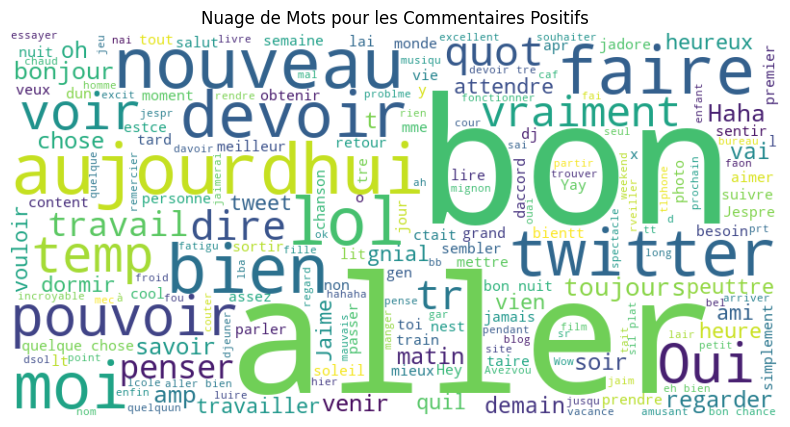

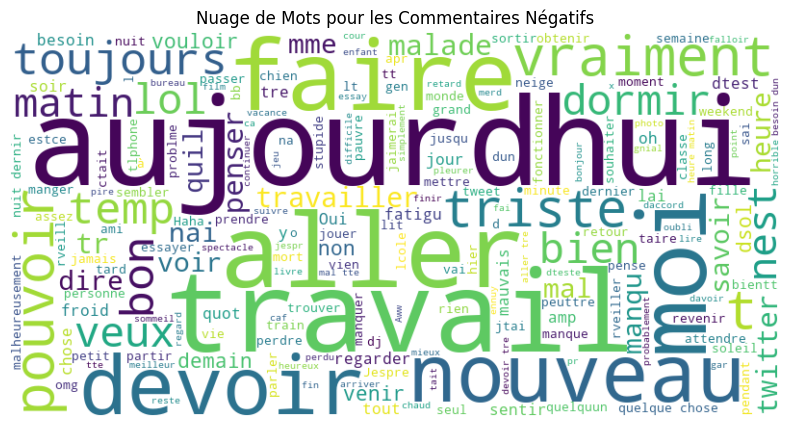

In [278]:
# Séparer les commentaires positifs et négatifs
positifs = data[data['label'] == 1]['text_lemmatized']
negatifs = data[data['label'] == 0]['text_lemmatized']

# Créer une fonction pour générer un nuage de mots
def creer_nuage_mots(textes, titre):
    nuage = WordCloud(width=800, height=400, background_color='white').generate(" ".join(textes))
    plt.figure(figsize=(10,5))
    plt.imshow(nuage, interpolation='bilinear')
    plt.title(titre)
    plt.axis('off')
    plt.show()

# Générer un nuage de mots pour les commentaires positifs
creer_nuage_mots(positifs, 'Nuage de Mots pour les Commentaires Positifs')

# Générer un nuage de mots pour les commentaires négatifs
creer_nuage_mots(negatifs, 'Nuage de Mots pour les Commentaires Négatifs')


#### Vectorisation des commentaires : 
Transformer les commentaires en vecteurs numériques admissible par un algorithme de machine learning.
On va utiliser le vectoriseur Tf-Idf (cf glossaire NLP)

In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
text_lemmatizedd = data['text_lemmatized']  # Define the variable "text_lemmatized"
X = vectorizer.fit_transform(text_lemmatizedd)
# X.shape

In [280]:
vectorizer.vocabulary_

{'aimer': 28,
 'gar': 362,
 'meilleur': 539,
 'me': 537,
 'soir': 840,
 'attendre': 70,
 'fille': 335,
 'twitter': 936,
 'devoir': 234,
 'rencontrer': 770,
 'tiez': 900,
 'tre': 922,
 'malade': 518,
 'tr': 915,
 'vraiment': 983,
 'bon': 103,
 'march': 527,
 'mal': 517,
 'manger': 522,
 'vrai': 982,
 'nourriture': 600,
 'ami': 38,
 'soupe': 849,
 'effet': 281,
 'mond': 560,
 'pouvoir': 700,
 'luire': 506,
 'dire': 240,
 'vien': 961,
 'rire': 789,
 'fort': 348,
 'raison': 752,
 'faire': 319,
 'sortir': 846,
 'rponse': 798,
 'javais': 432,
 'dj': 246,
 'trouv': 925,
 'jaloux': 426,
 'jespr': 434,
 'pas': 643,
 'moment': 559,
 'aim': 26,
 'aime': 27,
 'spectacle': 854,
 'ah': 21,
 'mr': 569,
 'finalement': 338,
 'rejoindre': 767,
 'rpondu': 797,
 'chat': 133,
 'stupide': 861,
 'erreur': 299,
 'lcole': 468,
 'fou': 349,
 'dur': 279,
 '10': 0,
 'heure': 392,
 'poindre': 688,
 'regarder': 766,
 'colline': 154,
 'ha': 385,
 'joyeux': 446,
 'anniversaire': 51,
 'oubli': 620,
 'homme': 399,
 'de

In [286]:
# for x in X:
#     print('vecteur texte : ', x)

#### Analyse des commentaires vectorisés
- Afficher des graphiques en barre montarant les 10 mots ayant le plus de poids dans les commentaires positifs et négatifs.

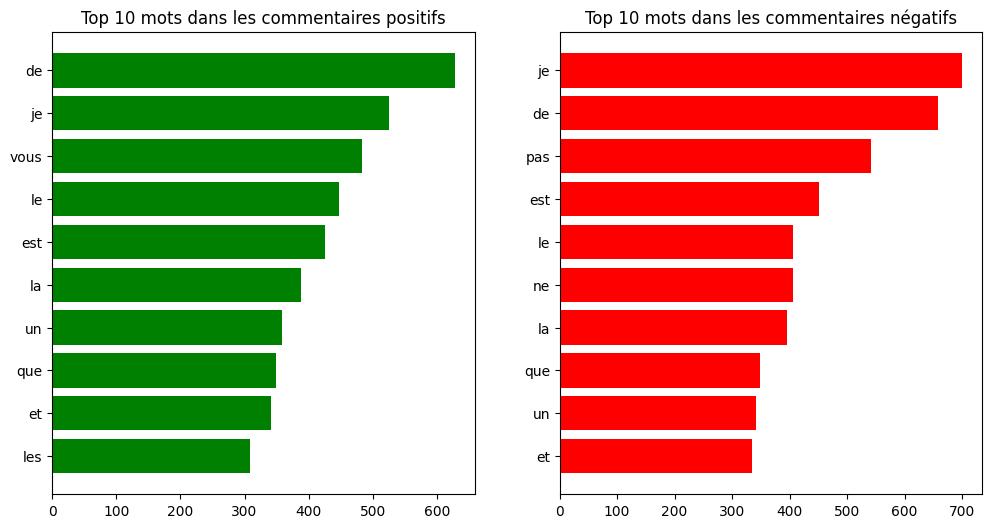

In [293]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['text_lemmatized'])
features = vectorizer.get_feature_names_out()

# Séparation des indices des commentaires positifs et négatifs
indices_positifs = data[data['label'] == 1].index
indices_negatifs = data[data['label'] == 0].index

# Calcul des scores TF-IDF cumulés pour chaque terme dans les commentaires positifs et négatifs
tfidf_positifs = np.sum(X[indices_positifs], axis=0)
tfidf_negatifs = np.sum(X[indices_negatifs], axis=0)

# Convertir la matrice sparse en matrice dense si nécessaire
if isinstance(tfidf_positifs, np.matrix):
    tfidf_positifs = tfidf_positifs.A1
if isinstance(tfidf_negatifs, np.matrix):
    tfidf_negatifs = tfidf_negatifs.A1

# Trier les mots par leur score TF-IDF et sélectionner les 10 mots les plus élevés
top_positifs_indices = np.argsort(tfidf_positifs)[-10:]
top_negatifs_indices = np.argsort(tfidf_negatifs)[-10:]

top_positifs_features = features[top_positifs_indices]
top_negatifs_features = features[top_negatifs_indices]

top_positifs_scores = tfidf_positifs[top_positifs_indices]
top_negatifs_scores = tfidf_negatifs[top_negatifs_indices]

# Création des graphiques en barres pour les mots positifs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_positifs_features, top_positifs_scores, color='green')
plt.title('Top 10 mots dans les commentaires positifs')

# Création des graphiques en barres pour les mots négatifs
plt.subplot(1, 2, 2)
plt.barh(top_negatifs_features, top_negatifs_scores, color='red')
plt.title('Top 10 mots dans les commentaires négatifs')

plt.show()


#### Séparation des données train et test pour entraînement

In [299]:
from sklearn.model_selection import train_test_split

# On suppose que X est la matrice TF-IDF des commentaires et y est le vecteur des étiquettes (labels)
y = data['label']

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train et y_train sont maintenant vos données d'entraînement,
# tandis que X_test et y_test sont vos données de test.


### Classification Machine Learning
Faire une regression logistique pour classer les revues positives et négatives. Evaluer votre modèle sur le test

In [300]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [303]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [304]:
# Score du modèle sur les données d'entraînement
model.score(X_train, y_train)

0.7605625

##### Evaluation du modèle

In [305]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [306]:
y_pred = model.predict(X_test)

In [308]:
accuracy_score(y_test, y_pred)

0.72925

In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1981
           1       0.72      0.75      0.74      2019

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [310]:
confusion_matrix(y_test, y_pred)

array([[1396,  585],
       [ 498, 1521]], dtype=int64)